In [1]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.24/06


In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
import visualization as vis
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import include_modules_root as rt
import lsfit


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
# Figure configuration are saved in this file include_figure_preset.py
from include_figure_preset import * 
# Set Figure font family, fontsize, ticks, etc.
plt_config(family="san-serif", fontsize_multi=1) # or "serif", or an exact font name

# Redefine a function to save figures with common settings 
fig_prefix = "plots/singletrack_MuonPion_"    # It's good to keep figures in a separate folder. Can also be set to None.
fig_format = "jpg"      # for multiple formats, e.g.: "pdf,png"
SAVE_FIG = True         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.
# You can then do `savefig(filename_without_extension)` to save your plots with these settings
savefig = Save_fig(fig_prefix=fig_prefix, exts=fig_format, SAVE= SAVE_FIG, dpi=300)

In [4]:
plot_data_pion = joblib.load(f"{DATA_DIR}/plot_data_pion_singletrack.jojblib")
plot_data_muon = joblib.load(f"{DATA_DIR}/plot_data_muon_singletrack.jojblib")
plot_data_all = [plot_data_muon,plot_data_pion]

plot_data_pion_LS = joblib.load(f"{DATA_DIR}/plot_data_pion_singletrack_LS.jojblib")
plot_data_muon_LS = joblib.load(f"{DATA_DIR}/plot_data_muon_singletrack_LS.jojblib")
plot_data_all_LS = [plot_data_muon_LS,plot_data_pion_LS]


findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


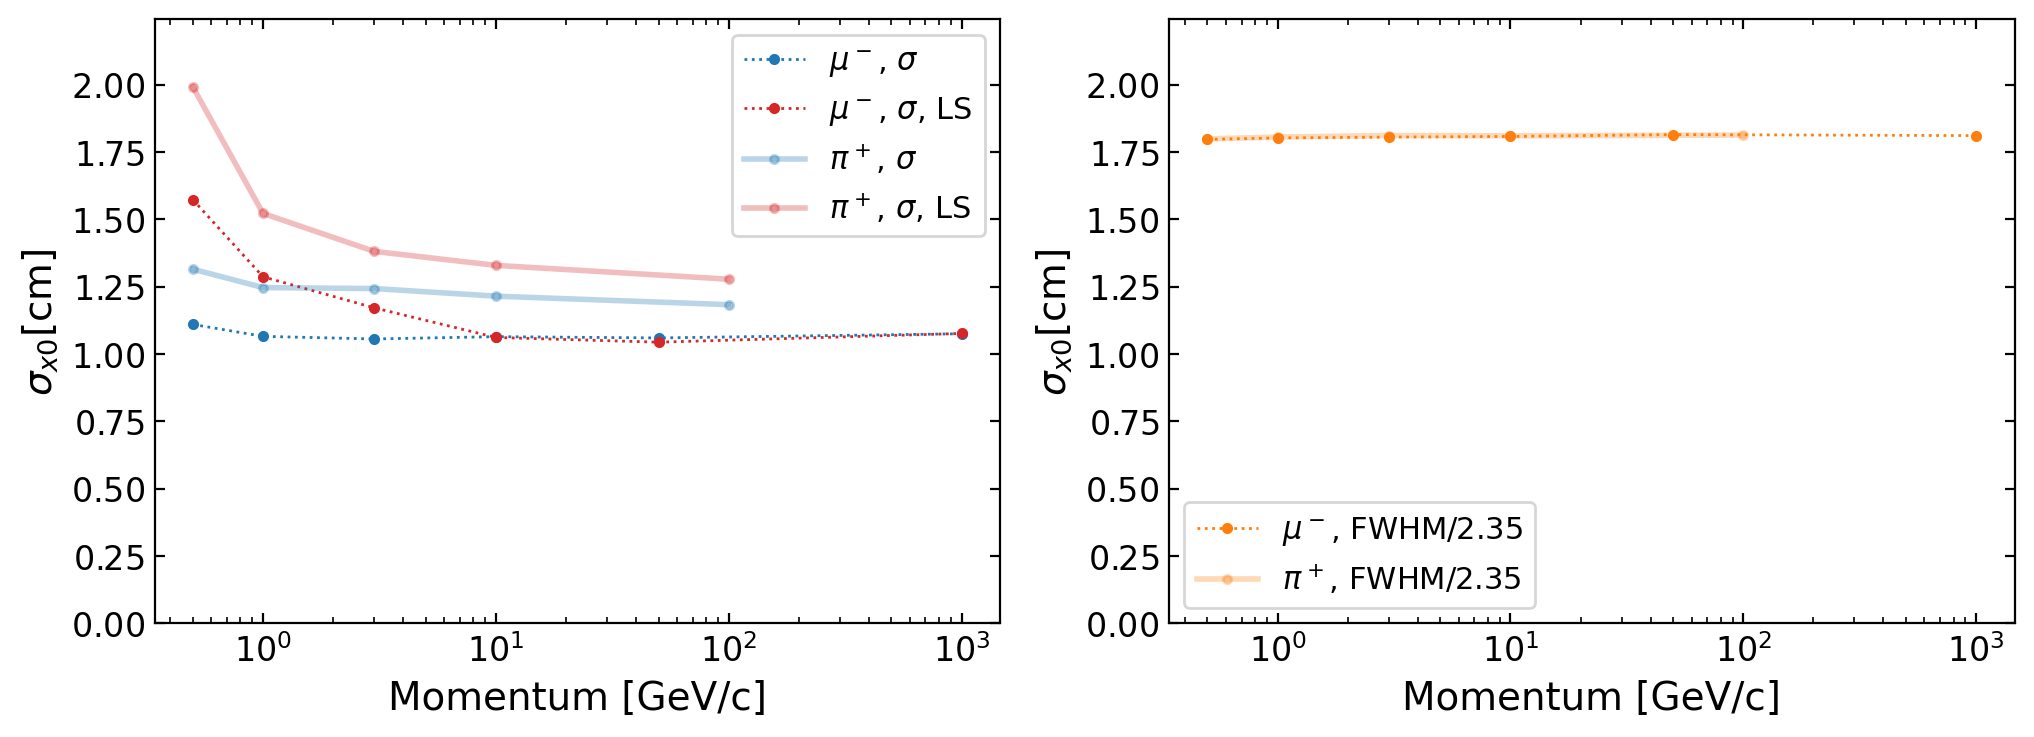

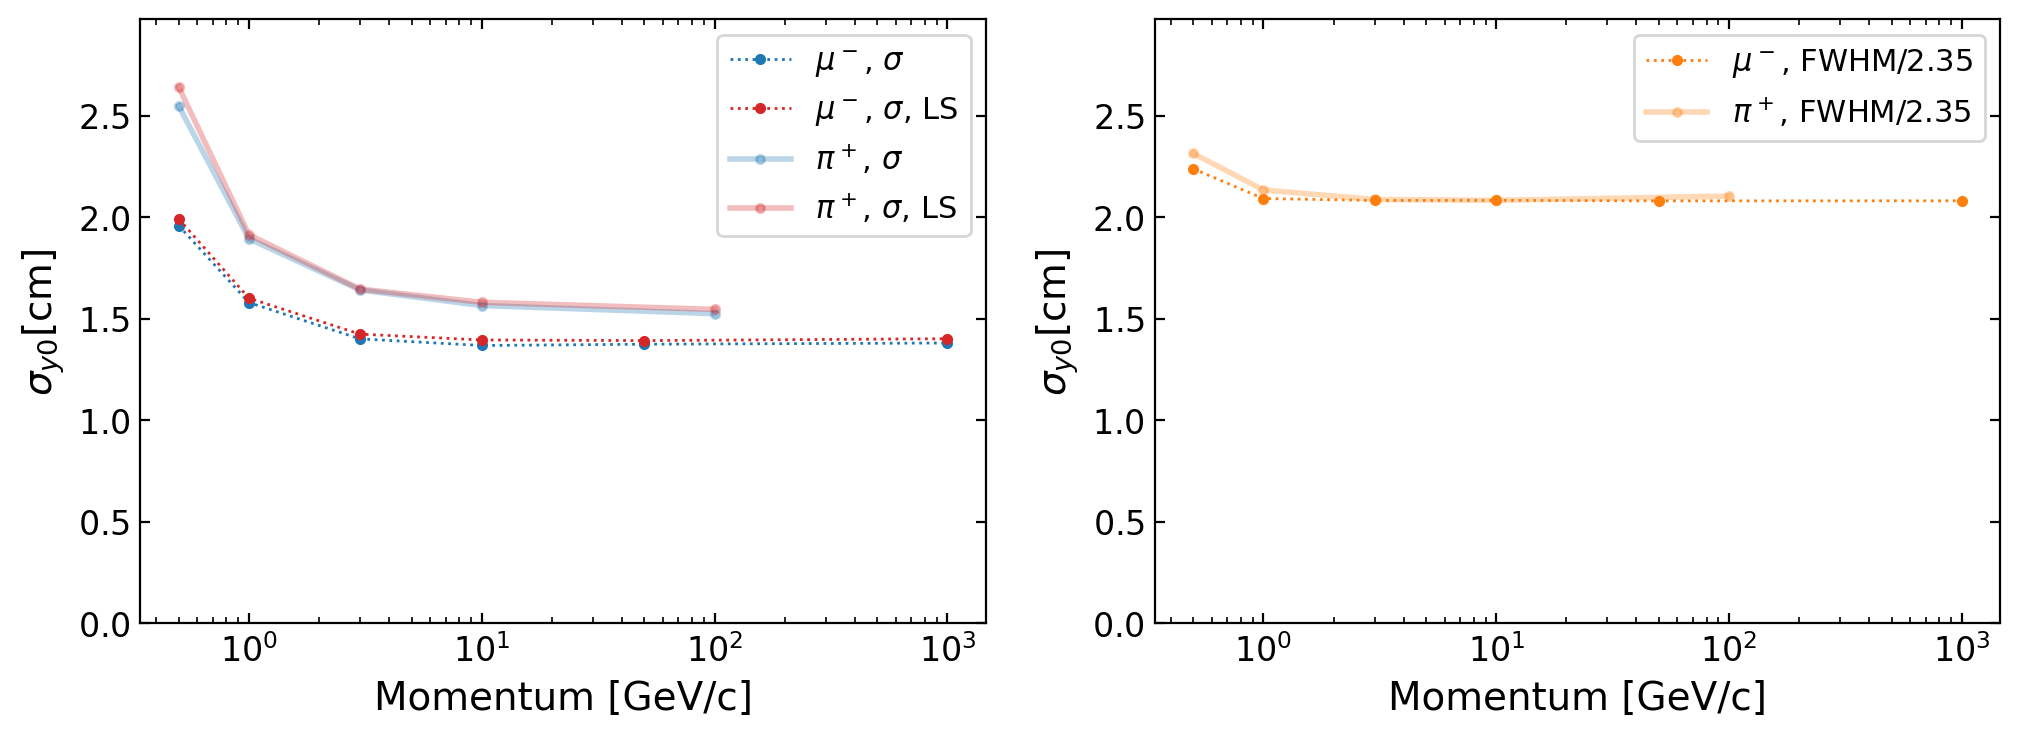

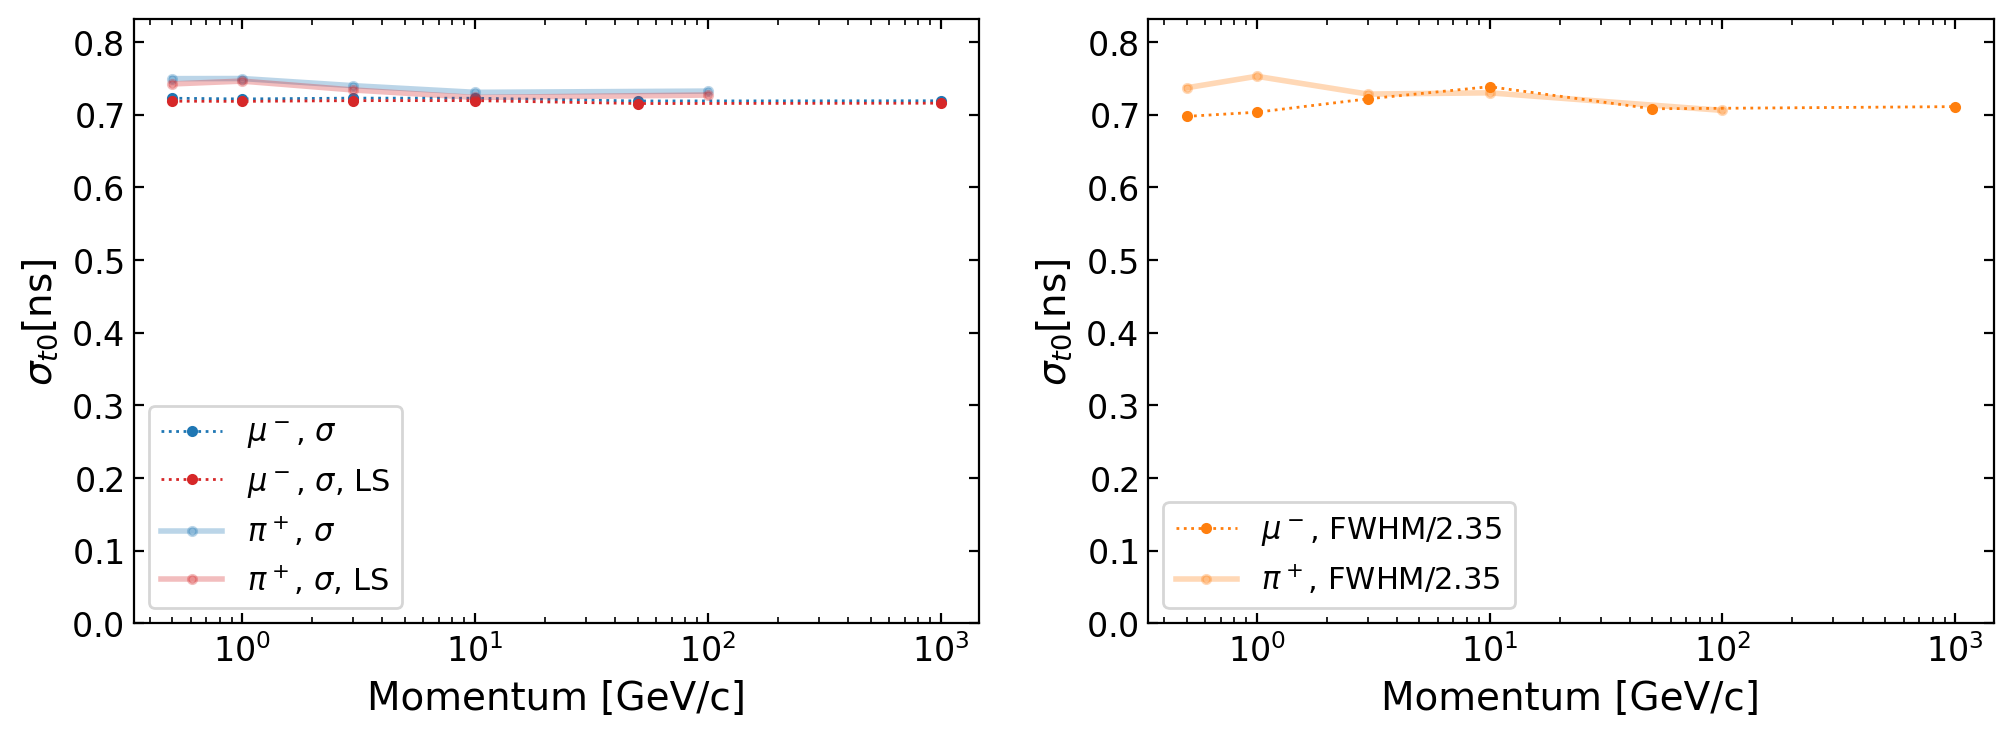

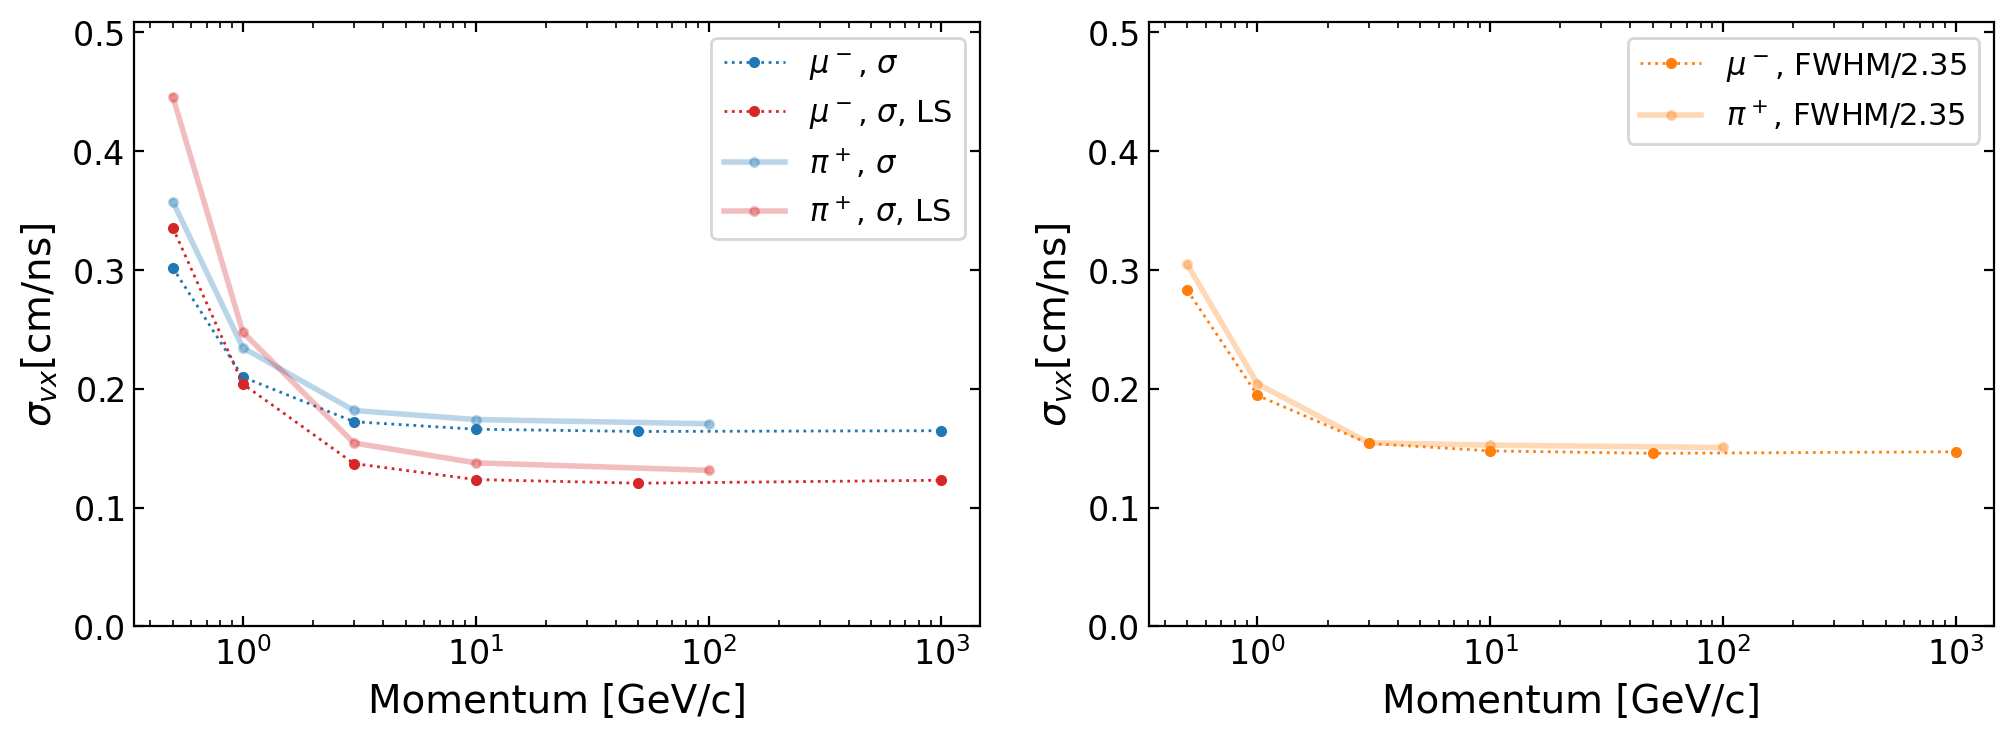

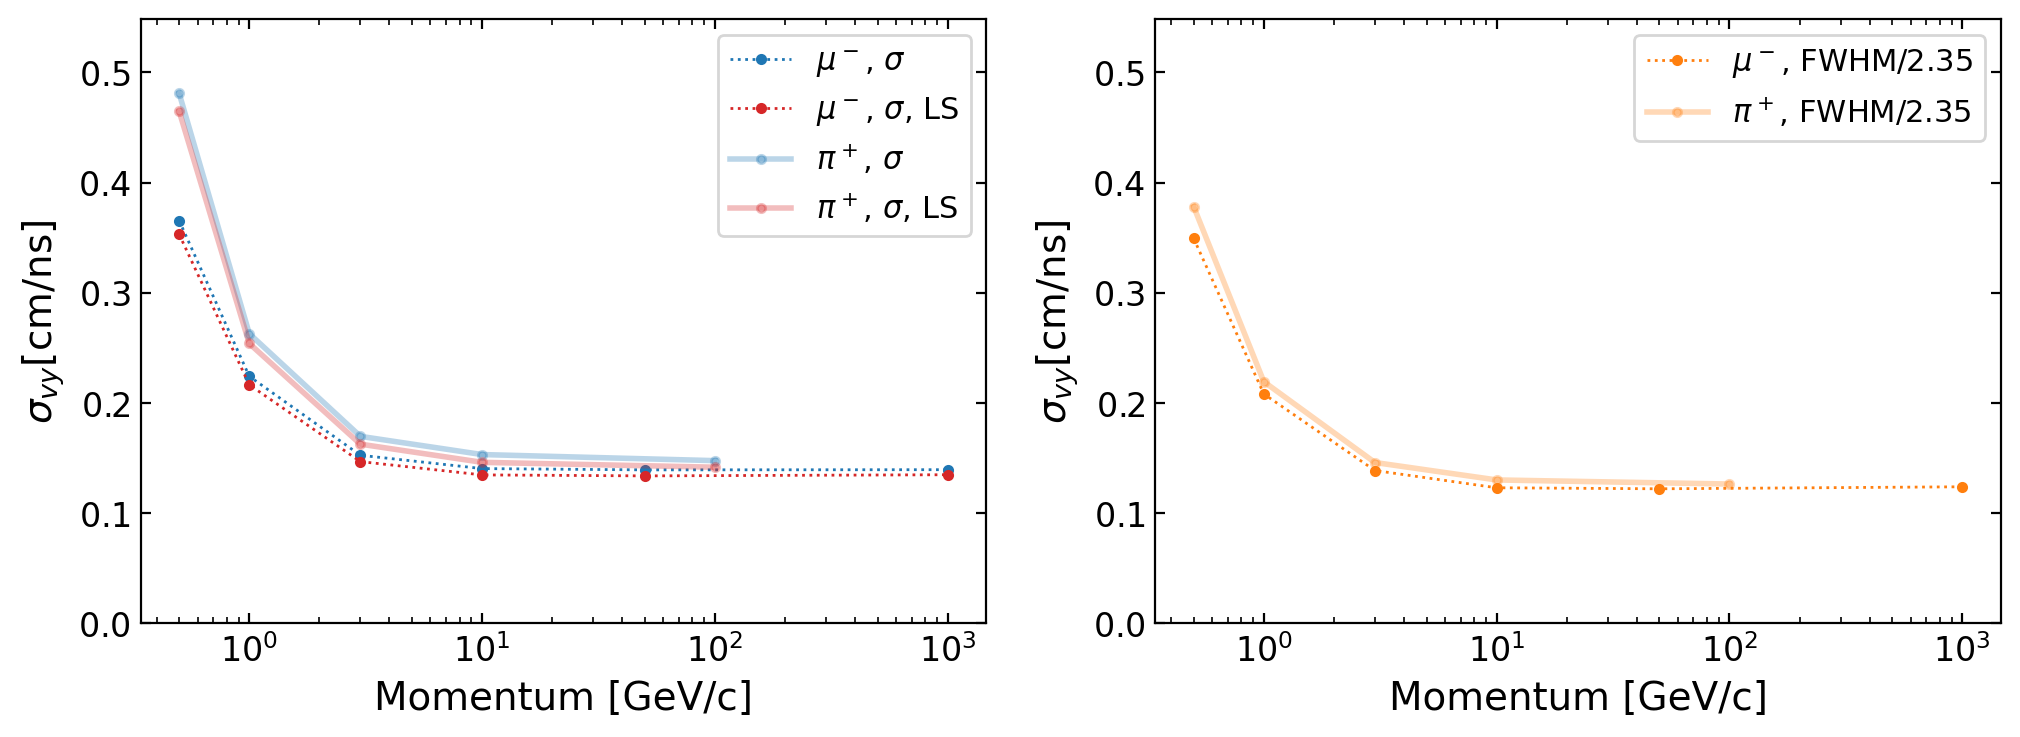

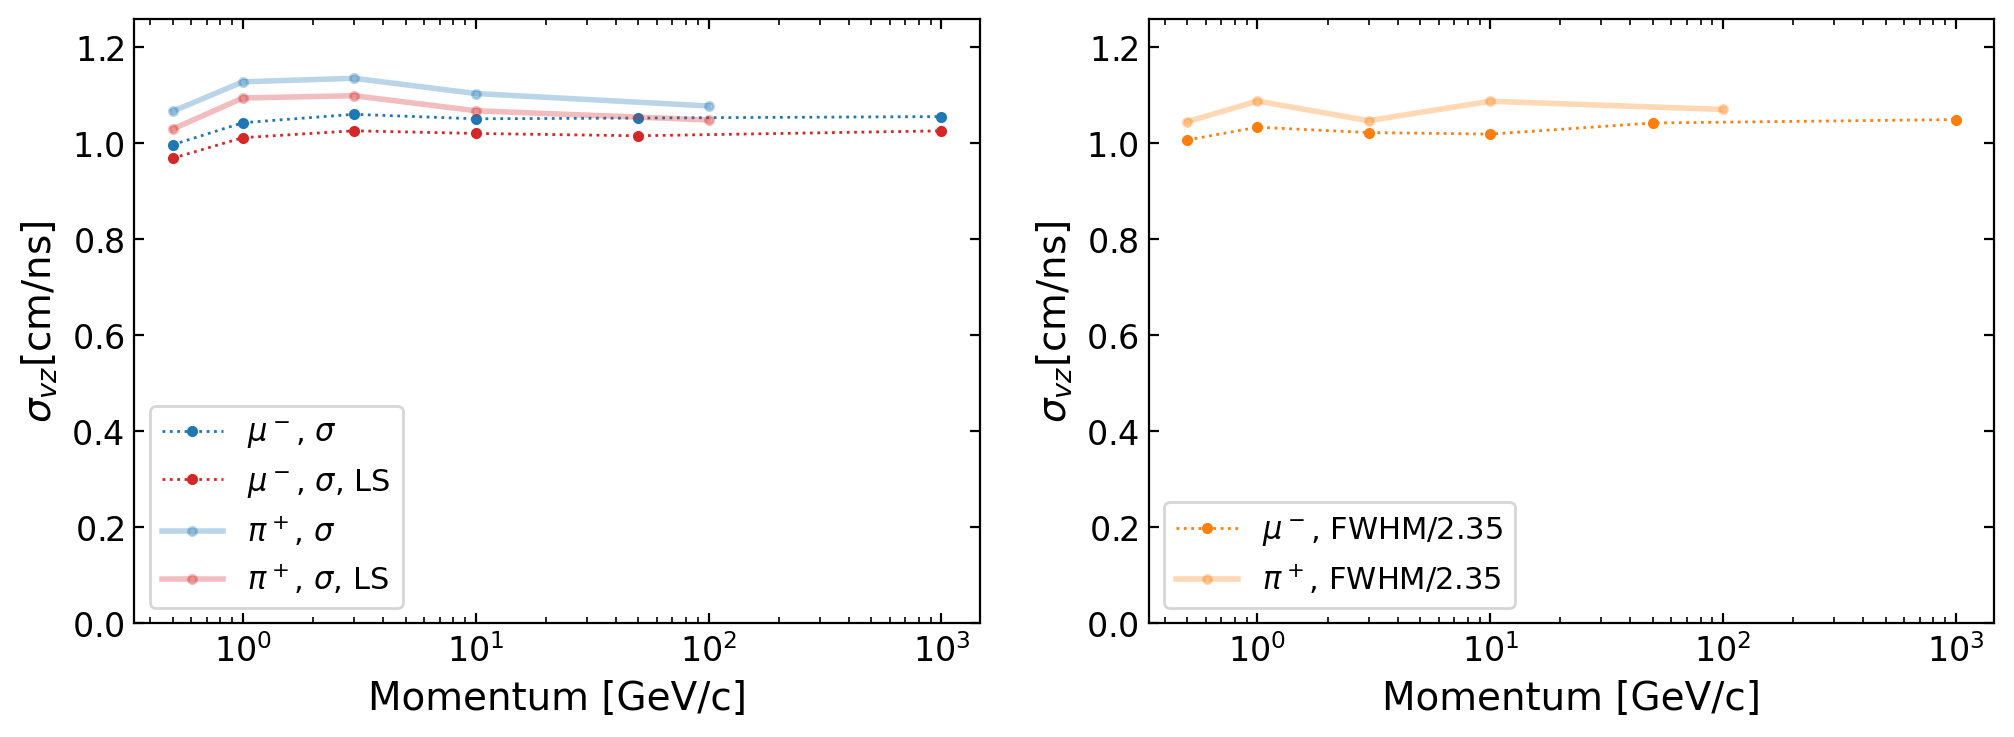

In [5]:
axlabels=["x0 [cm]","y0 [cm]", "t0 [ns]", "vx [cm/ns]", "vy [cm/ns]", "vz [cm/ns]"]

linewidths = [1,2]
linestyles = [":","-"]
alphas=[1,0.3]
sublabel=[r"$\mu^-$", r"$\pi^+$"]
for ipar in range(6):
    fig,axs=subplots(1,2,figsize=(12,4))
    for i in range(2):
        plot_data = plot_data_all[i]
        plot_data_res = plot_data[0]    
        es,sigmas,fwhms = plot_data_res[ipar]
        sca(axs[0])
        plot(es, sigmas,color="C0",label=sublabel[i]+ r", $\sigma$",marker=".", linewidth = linewidths[i],alpha=alphas[i],linestyle=linestyles[i])
        sca(axs[1])
        plot(es, fwhms,color="C1",label=sublabel[i]+ ", FWHM/2.35",marker=".", linewidth = linewidths[i],alpha=alphas[i],linestyle=linestyles[i])    
        
        
        plot_data = plot_data_all_LS[i]
        plot_data_res = plot_data[0]    
        es,sigmas,fwhms = plot_data_res[ipar]
        sca(axs[0])
        plot(es, sigmas,color="C3",label=sublabel[i]+ r", $\sigma$, LS",marker=".", linewidth = linewidths[i],alpha=alphas[i],linestyle=linestyles[i])        
    
    ylim_pre = np.max([axs[0].get_ylim()[1],axs[1].get_ylim()[1]])
    for ii in range(2):
        sca(axs[ii])
        
        axname = axlabels[ipar].split(" ")[0]
        t = "$\sigma_{"+ f"{axname}" + "}$" + axlabels[ipar].split(" ")[1]
        ylabel(fr"{t}")
        xlabel("Momentum [GeV/c]")
        legend(fontsize=11)
        xscale('log')
        ylim(0,ylim_pre*1.1)
    savefig(f"resolution_{ipar}")
    show()


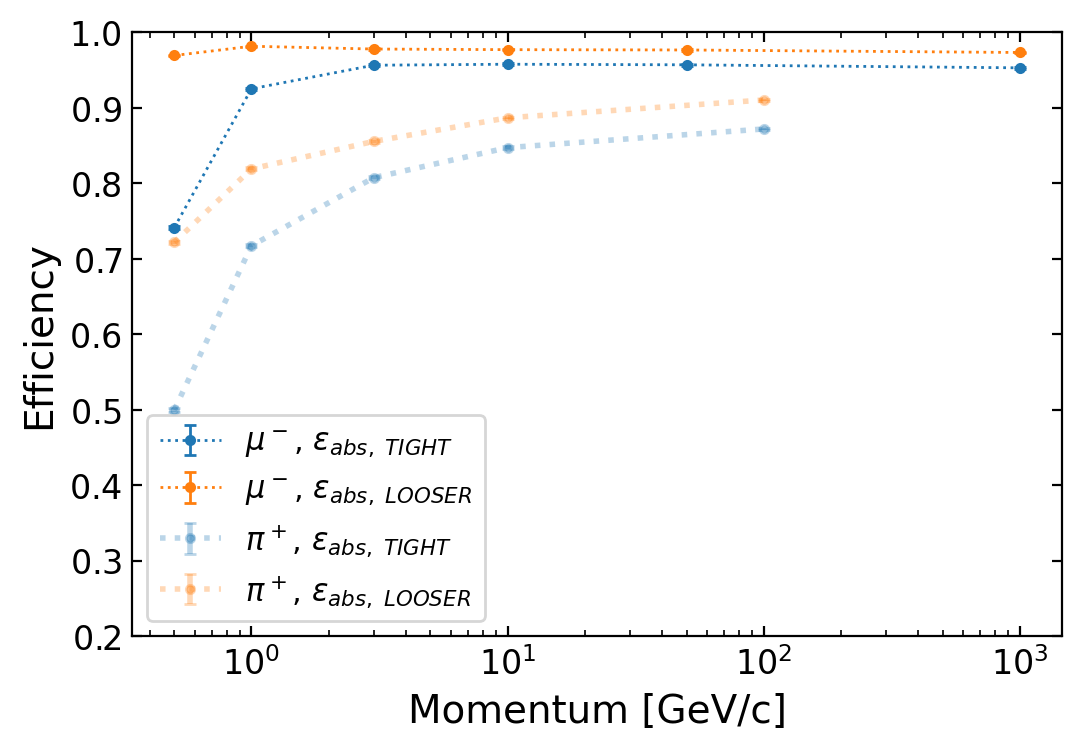

In [6]:
for i in range(2):
    plot_data = plot_data_all[i]
    es, ef1, ef2, ef3, ef4, ef5, ef6 = plot_data[1]

    # errorbar(es, effs1, yerr=[effs1_err_l,effs1_err_h],fmt="o-",color="C0",label=sublabel[i]+", raw",markersize=3,capsize=2, linewidth = linewidths[i],alpha=alphas[i])
    # errorbar(es, ef1[0], yerr=[ef1[1],ef1[2]],fmt="o-",color="C0",label=sublabel[i]+r", $\epsilon_{abs}$",markersize=3,capsize=2, linewidth = linewidths[i],alpha=alphas[i])
    errorbar(es, ef2[0], yerr=[ef2[1],ef2[2]],fmt="o:",color=f"C0",label=sublabel[i]+r", $\epsilon_{abs,\ TIGHT}$",markersize=3,capsize=2, linewidth = linewidths[i],alpha=alphas[i])
    errorbar(es, ef6[0], yerr=[ef6[1],ef6[2]],fmt="o:",color=f"C1",label=sublabel[i]+r", $\epsilon_{abs,\ LOOSER}$",markersize=3,capsize=2, linewidth = linewidths[i],alpha=alphas[i])



xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
xscale("log")
ylim(0.2, 1)
legend(fontsize=11)
savefig("efficiency")

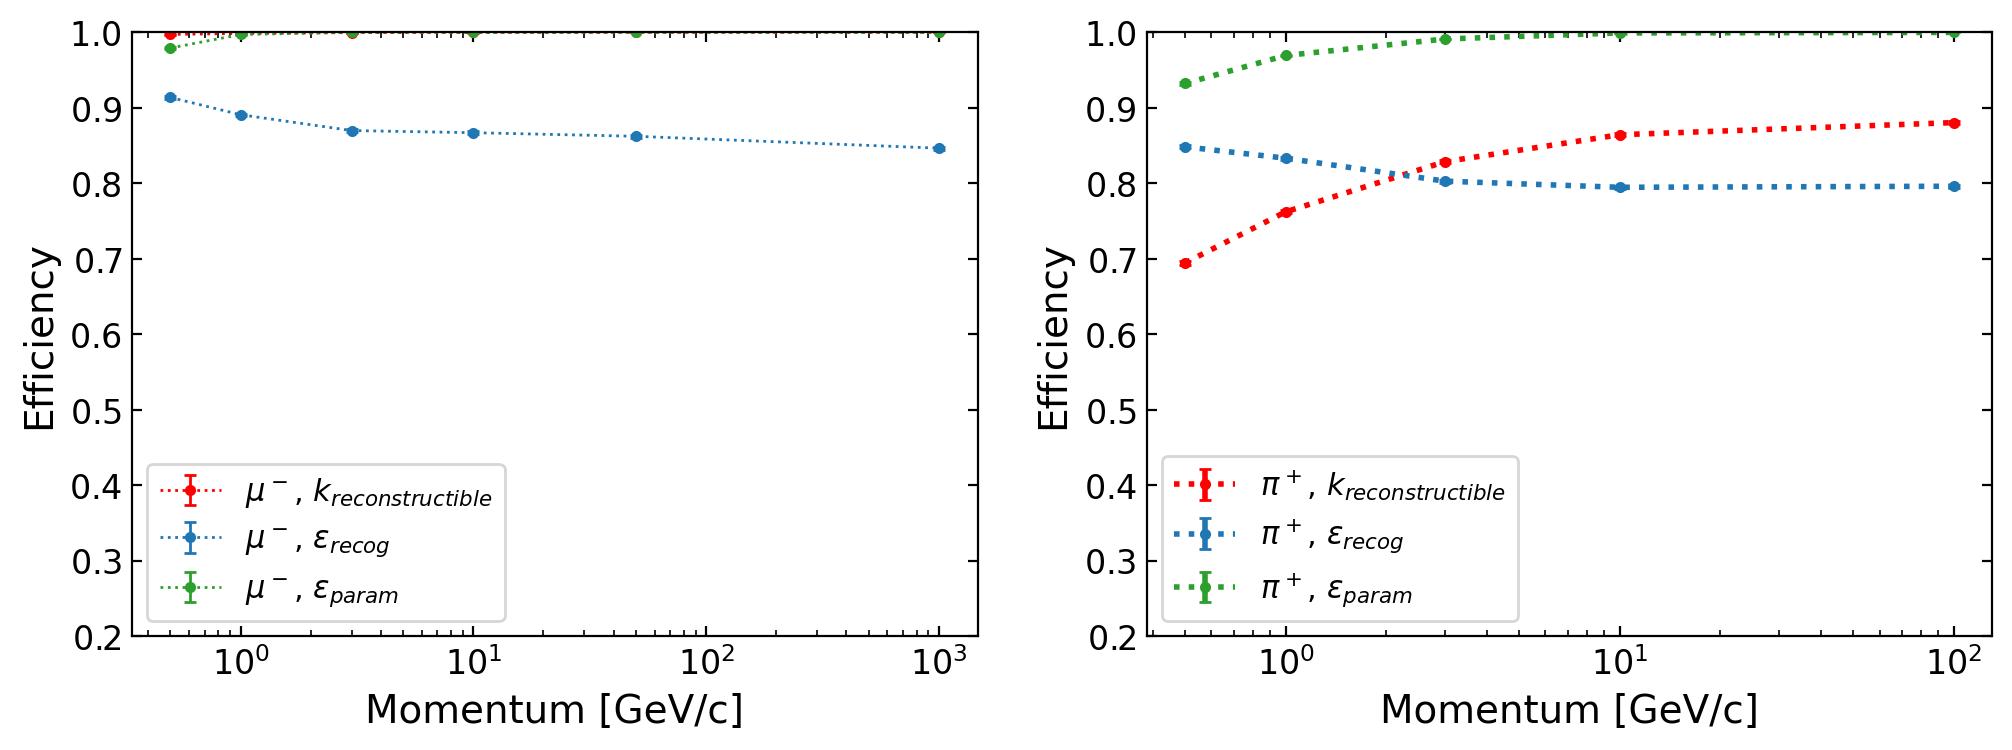

In [30]:
fig,axs=subplots(1,2,figsize=(12,4))
for i in range(2):
    plot_data = plot_data_all[i]
    es, ef1, ef2, ef3, ef4, ef5, ef6= plot_data[1]

    sca(axs[i])
    errorbar(es, ef3[0], yerr=[ef3[1],ef3[2]],fmt="o:",color="r",label=sublabel[i]+r", $k_{reconstructible}$",markersize=3,capsize=2, linewidth = linewidths[i])
    errorbar(es, ef4[0], yerr=[ef4[1],ef4[2]],fmt="o:",color="C0",label=sublabel[i]+r", $\epsilon_{recog}$",markersize=3,capsize=2, linewidth = linewidths[i])
    errorbar(es, ef5[0], yerr=[ef5[1],ef5[2]],fmt="o:",color="C2",label=sublabel[i]+r", $\epsilon_{param}$",markersize=3,capsize=2, linewidth = linewidths[i])

    xlabel("Momentum [GeV/c]")
    ylabel("Efficiency")
    xscale("log")
    ylim(0.2,1)
    legend(fontsize=11)
savefig("efficiency_breakdown")

### Compare with LS

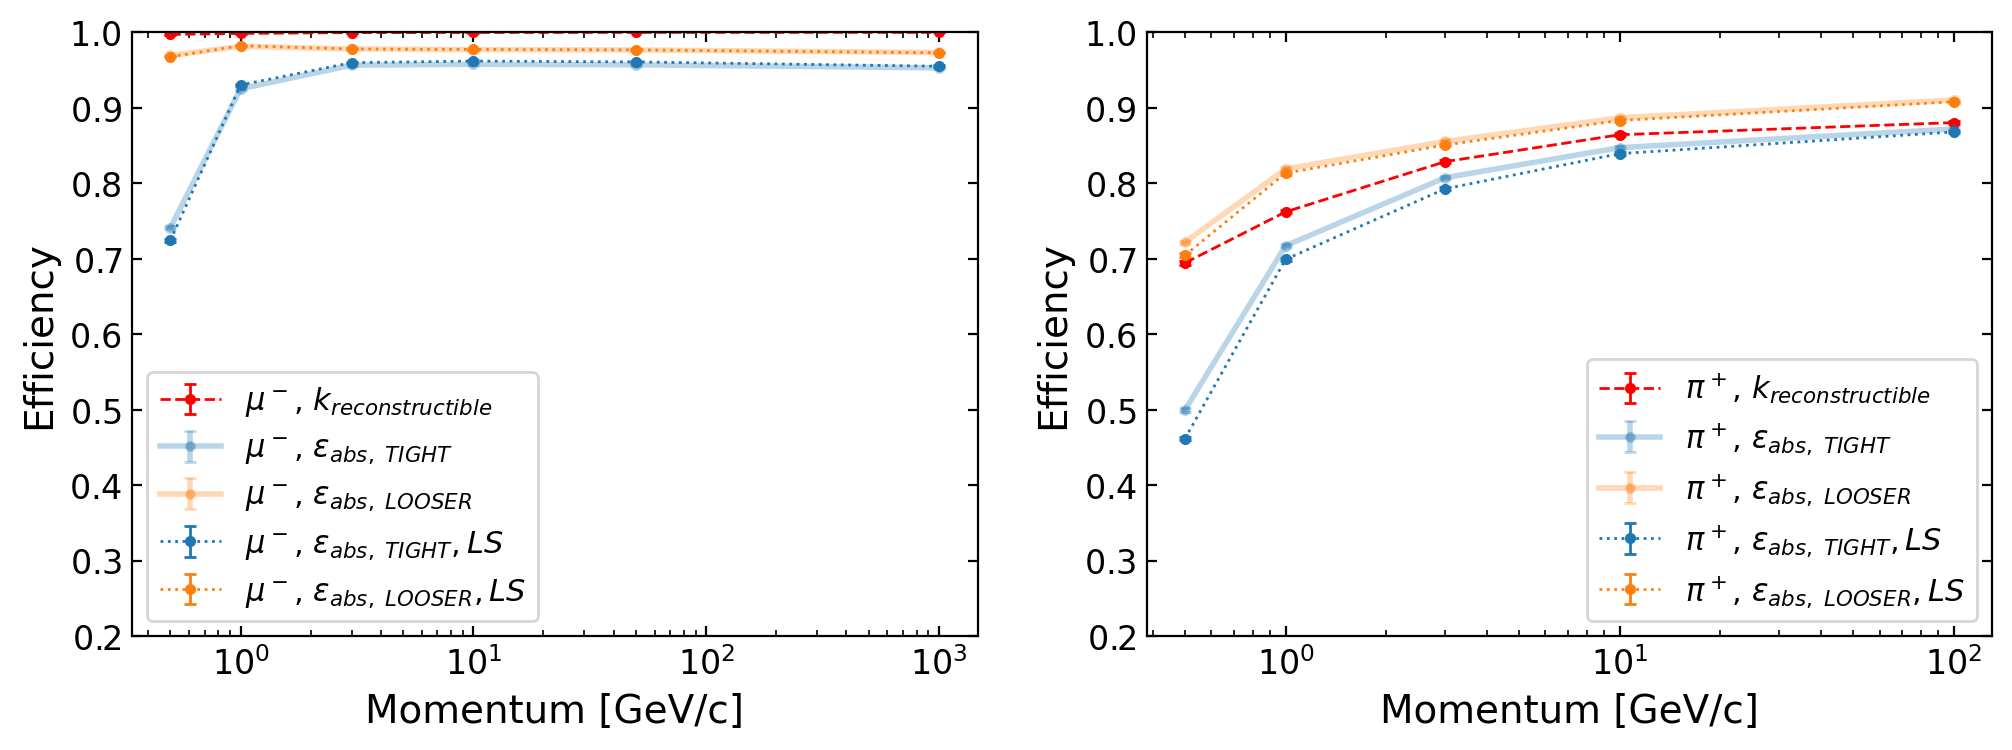

In [8]:
fig,axs=subplots(1,2,figsize=(12,4))

for i in range(2):
    sca(axs[i])
    
    plot_data = plot_data_all[i]
    es, ef1, ef2, ef3, ef4, ef5, ef6 = plot_data[1]
    errorbar(es, ef3[0], yerr=[ef3[1],ef3[2]],fmt="o--",color="r",label=sublabel[i]+r", $k_{reconstructible}$",markersize=3,capsize=2, linewidth =1,alpha=1)

    errorbar(es, ef2[0], yerr=[ef2[1],ef2[2]],fmt="o-",color=f"C0",label=sublabel[i]+r", $\epsilon_{abs,\ TIGHT}$",markersize=3,capsize=2, linewidth = 2,alpha=0.3)
    errorbar(es, ef6[0], yerr=[ef6[1],ef6[2]],fmt="o-",color=f"C1",label=sublabel[i]+r", $\epsilon_{abs,\ LOOSER}$",markersize=3,capsize=2, linewidth = 2,alpha=0.3)
    
    plot_data = plot_data_all_LS[i]    
    es, ef1, ef2, ef3, ef4, ef5, ef6 = plot_data[1]
    errorbar(es, ef2[0], yerr=[ef2[1],ef2[2]],fmt="o:",color=f"C0",label=sublabel[i]+r", $\epsilon_{abs,\ TIGHT}, LS$",markersize=3,capsize=2, linewidth = 1,alpha=1)
    errorbar(es, ef6[0], yerr=[ef6[1],ef6[2]],fmt="o:",color=f"C1",label=sublabel[i]+r", $\epsilon_{abs,\ LOOSER}, LS$",markersize=3,capsize=2, linewidth = 1,alpha=1)




    xlabel("Momentum [GeV/c]")
    ylabel("Efficiency")
    xscale("log")
    ylim(0.2, 1)
    legend(fontsize=11)
    
savefig("efficiency_LS")

In [15]:
# DATA_DIR    = "/project/def-mdiamond/tomren/mathusla/data/fit_study"
files=glob.glob(f"{DATA_DIR}/muon_1000_GeV/*/*/stat_seedmod.root",)
print(files)
file_prefix=os.path.dirname(files[0])
tree_name="integral_tree"

filename = files[0]


results_original={}
lsfit.get_km(f"{file_prefix}/stat_original.root", results_original, tree_name)
results_new={}
lsfit.get_km(f"{file_prefix}/stat_seedmod.root", results_new, tree_name)

recon = results_original["par_km"]
truth = results_original["par_km_truth"]

diffx = recon[:,3]-truth[:,3]
diffy = recon[:,0]-truth[:,0]
diffvx = recon[:,6]-truth[:,6]
diffvy = recon[:,4]-truth[:,4]

mask_3sigma = mask_LOOSER = (np.abs(diffx)<10) & (np.abs(diffy)<10) & (np.abs(diffvx)<1) & (np.abs(diffvy)<1)


['/project/def-mdiamond/tomren/mathusla/data/fit_study/muon_1000_GeV/20230411/185206/stat_seedmod.root']


100%|██████████| 40000/40000 [00:20<00:00, 1908.77it/s]


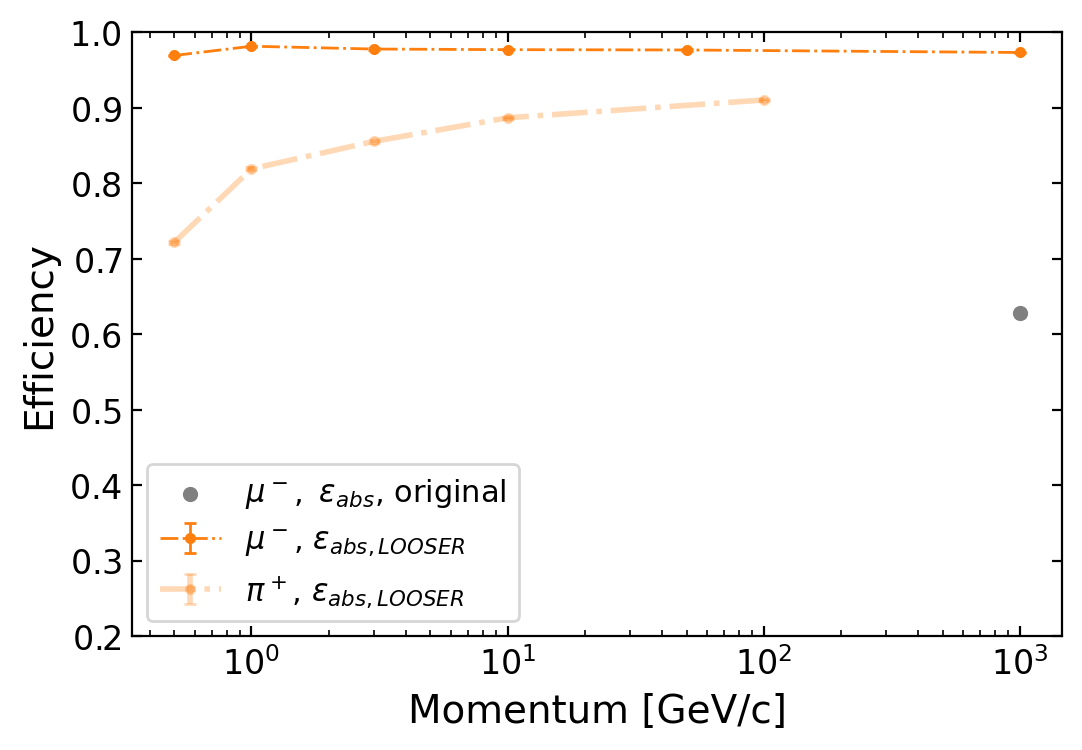

In [14]:
for i in range(2):
    plot_data = plot_data_all[i]
    es, ef1, ef2, ef3, ef4, ef5, ef6 = plot_data[1]

    # errorbar(es, effs1, yerr=[effs1_err_l,effs1_err_h],fmt="o-",color="C0",label=sublabel[i]+", raw",markersize=3,capsize=2, linewidth = linewidths[i],alpha=alphas[i])
    # errorbar(es, ef1[0], yerr=[ef1[1],ef1[2]],fmt="o-",color="C0",label=sublabel[i]+r", $\epsilon_{abs}$",markersize=3,capsize=2, linewidth = linewidths[i],alpha=alphas[i])
    errorbar(es, ef6[0], yerr=[ef6[1],ef6[2]],fmt="o-.",color="C1",label=sublabel[i]+r", $\epsilon_{abs, LOOSER}$",markersize=3,capsize=2, linewidth = linewidths[i],alpha=alphas[i])


scatter(1000,sum(mask_3sigma)/40000, s=20, label=r"$\mu^-,\ \epsilon_{abs}$, original",color="grey")

xlabel("Momentum [GeV/c]")
ylabel("Efficiency")
xscale("log")
ylim(0.2,1)
legend(fontsize=11)
savefig("efficiency_compare")

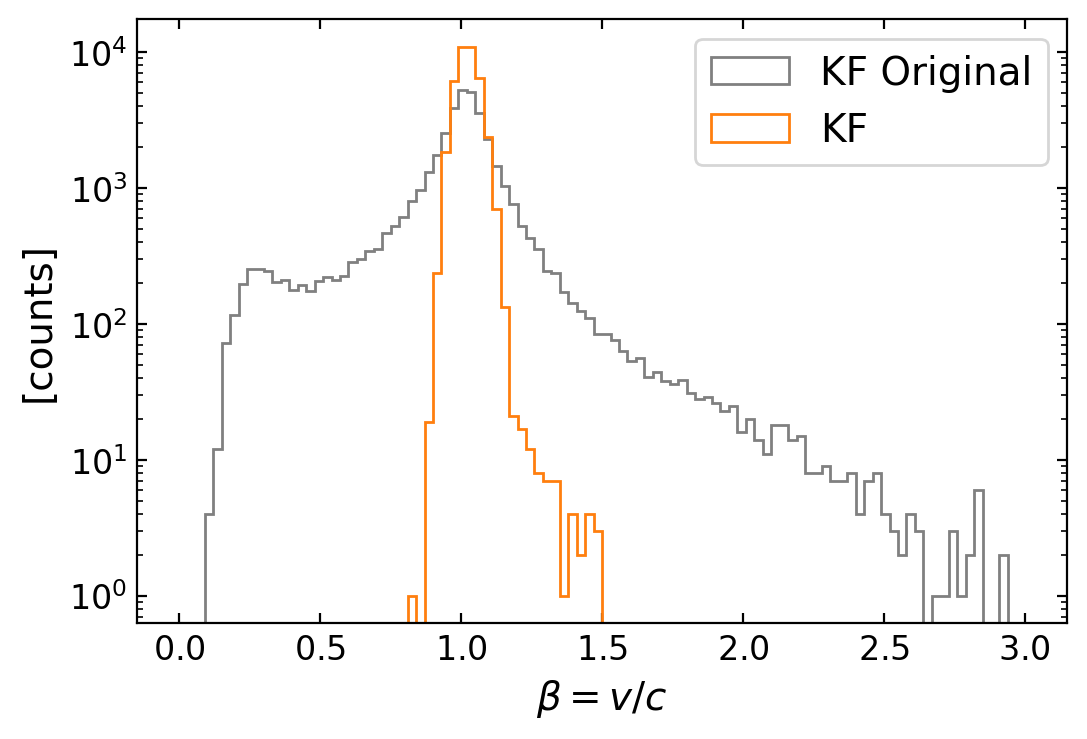

In [28]:
results_new.keys()
beta_old = np.sqrt(results_original["par_km"][:,3]**2+results_original["par_km"][:,4]**2+results_original["par_km"][:,5]**2)
beta_new = np.sqrt(results_new["par_km"][:,3]**2+results_new["par_km"][:,4]**2+results_new["par_km"][:,5]**2)
hist(beta_old/29.97,range=(0,3),histtype="step",label="KF Original",color="grey");
hist(beta_new/29.97,range=(0,3),histtype="step",label="KF",color="C1");
yscale("log")
xlabel(r"$\beta = v/c$")
ylabel("[counts]")
legend()